# Multi Layer Perceptron

In contrast to a Linear Classifier, a multi-layer perceptron can be composed of a variable number of of fully connected layers. However, the power of the multi-layer perceptron comes from being able to use different activation functions in different layers that introduce non-linearity in the system, meaning that we are no longer constrained by a linear decision boundary.

This particular network is composed of 2 hidden layers, the first uses ReLU and the second uses sigmoid as their activation functions. Finally, softmax is applied on the 10 ouputs resulting from the matrix operations on the input.
The model uses SGD with a learning rate of 0.01 or 1e-2, batch size of 1 trained over 20 epochs with cross entropy loss.

sources: 


https://docs.pytorch.org/tutorials/beginner/nn_tutorial.html

ChatGPT GPT-5  and Gemini for more conceptual understanding

ChatGPT with GPT-5 and GPT-4o for help with LaTex formatting.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import sklearn.metrics
from utilities import train_test_split
# from sklearn.model_selection import train_test_split

In [2]:
# load and split data into train and test set

# load the numpy array and convert it to a tensor
data = np.load("images_array.npy")
labels = np.load("labels_array.npy")

# data has shape (60_000, 784)
# labels has shape (60_000)
data = torch.from_numpy(data)
labels = torch.from_numpy(labels)

# convert data to float 32 and do a train test split
data = data.type(torch.float32)
# convert labels into torch.long type for use in torch 
labels = labels.type(torch.long)
x_train, y_train, x_test, y_test = train_test_split(data, labels, train_size=0.7)

# dimensions of training data:
n, c = x_train.shape
x_train.shape


torch.Size([44427, 784])

In [ ]:
# build the neural net
from torch import nn

In [4]:
model = nn.Sequential(
    nn.Linear(in_features=784, out_features=200),
    nn.ReLU(),
    nn.Linear(200, 10),
    nn.Softmax(dim=1)
)


In [5]:
model1 = nn.Sequential(
    nn.Linear(in_features=784, out_features=200),
    nn.ReLU(),
    nn.Linear(200, 10),
    nn.Softmax(dim=1)
)


In [40]:
# model iteration 2
model2 = nn.Sequential(
    nn.Linear(in_features=784, out_features=256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.Sigmoid(),
    nn.Linear(128, 10),
    nn.Softmax(dim=1)
)

### Cross Entropy Loss

$$L_{CE} = -\sum_{k=0}^{k-1}y_k log(p_k) $$

where:

k: Total number of classes

$y_k$: The true one-hot encoded value for that class

$p_k$: The predicted probability of the class


In [10]:
# define loss function 

loss_func = nn.CrossEntropyLoss()


# Fitting the model to the data

The fit() function will split the training data in `batches` of "bs" size. That is, it will consider only that number of samples at a time. Given the weights of the model, it will try to classify each sample in the batch. Then it wil calculate the loss using cross entropy. After these steps, it will calculate the gradients of the loss function and enter a loop where it will update its weights and its bias. This process will continue until it has gone through the entire dataset, at which point it will have completed an `epoch`. Then this process will repeat for however many epochs are set.

The function takes an argument called the `learning rate`. The learning rate, also known as the `step size` controls how much we move our weights. The weights will be updated byt the following rule:

$$
W_i \leftarrow W_{i-1} - \eta \frac{\partial L}{\partial W}
$$

Types of Gradient Descent:
There are threee types of gradient descent:

**Batch Gradient Descent**

Computes the gradient over the whole dataset.

**Stochastic Mini-batch Gradient Descent**

Computes the gradient of the loss function and updates the weights after considering a certain number of samples.

**Pure Stochastic Gradient Descent**

Computes the loss function on one sample and updates the weights after (e.g. If a dataset contains 30 samples, stochastic gradient descent will compute the loss on sample 1 then update the weights, then on sample 2 then update the weights, and so on)
Here, we use stochastic gradient descent as our approach.

Stochastic Gradient Descent or SGD has high noise and it is computationally expensive. However, it avoids getting stuck in a local minimum.


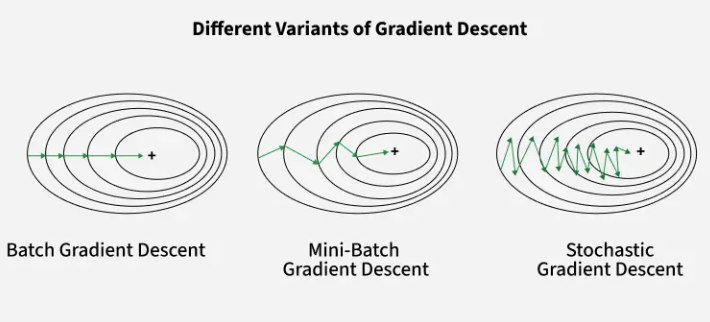

Image source: Geeks for Geeks

In [39]:
# Train model
def fit(model, loss_func, epochs = 2, lr = 1e-3, bs=1):
    for epoch in range(epochs):
        for i in range((n - 1) // bs + 1):
            start_i = i * bs
            end_i = start_i + bs
            xb = x_train[start_i:end_i]
            yb = y_train[start_i:end_i]
            pred = model(xb)
            loss = loss_func(pred, yb)

            # Stochastic Gradient Descent
            # manual Weight updates:
            loss.backward() # calculate the gradients of the loss function
            with torch.no_grad(): # update the parameters (weights and bias)
                for p in model.parameters():
                    p -= p.grad * lr
                model.zero_grad()


In [ ]:
# accuracy
def accuracy(out, yb):
    preds = torch.argmax(out, dim = 1)
    return (preds == yb).float().mean()


In [13]:
# function that prints the loss and the accuracy of the model when given the new data
def evaluate(model, loss_func, data, labels):

    print("Loss: ", loss_func(model(data), labels))
    print("Accuracy: ",  accuracy(model(data), labels))

evaluate(model, loss_func, x_train, y_train)

Loss:  tensor(1.8626, grad_fn=<NllLossBackward0>)
Accuracy:  tensor(0.5989)


In [41]:
fit(model = model2, loss_func=loss_func, epochs=20, lr=0.01)


In [38]:
# evaluate performance on training set
evaluate(model2, loss_func, x_train, y_train)

Loss:  tensor(1.5014, grad_fn=<NllLossBackward0>)
Accuracy:  tensor(0.9661)


In [36]:
# evaluate performance on testing set
evaluate(model2, loss_func, x_test, y_test)

Loss:  tensor(1.6158, grad_fn=<NllLossBackward0>)
Accuracy:  tensor(0.8495)
